In [1]:
# Importing the packages and dataset

import numpy as np
import pandas as pd

from sklearn import preprocessing 
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.metrics import roc_curve , auc , recall_score , precision_score , accuracy_score , f1_score
from sklearn.metrics import confusion_matrix , average_precision_score , recall_score  

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#Import interactive shell magic command which will help us print many statements on the same line
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Exploer Data

df.shape
type(df)
df.size
df.head()
df.tail()

(7043, 21)

pandas.core.frame.DataFrame

147903

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# Check for Missing Values

pd.isnull(df).any()
pd.isnull(df).sum()

#Find the types of variables , "Object" means strings or Categorical in the below output

df.info()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Except below variables all are Categorical Variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Find out number of customers who Churned Vs didn't

print("Count of Labels")
df.groupby("Churn").size()

Count of Labels


Churn
No     5174
Yes    1869
dtype: int64

In [7]:
#Convert Churn from (Yes, No) to (0 , 1)

le = preprocessing.LabelEncoder()

le.fit(df['Churn'])

list(le.classes_)

dfn = le.transform(df['Churn'])

le.inverse_transform([0,1])

LabelEncoder()

['No', 'Yes']

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['No', 'Yes'], dtype=object)

In [8]:
df['Y'] = dfn
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
Y                   7043 non-null

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Y'],
      dtype='object')

In [9]:
# Seperate out independent Categorical Variables for conversion into Numerical Variables

x_catg = df.loc[: , ( 'gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod')]
x_catg.head()
x_catg.tail()
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
7042,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)


(7043, 15)

In [10]:
# Seperate out Independent Numerical Variable

x_num = df.loc[: , ( 'SeniorCitizen','tenure','MonthlyCharges','TotalCharges' )]
x_num.head()
x_num.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
7038,0,24,84.80,1990.5
7039,0,72,103.20,7362.9
7040,0,11,29.60,346.45
7041,1,4,74.40,306.6
7042,0,66,105.65,6844.5


In [11]:
# Convert Categorical Variables to Dummy Coding


x_num1 = pd.get_dummies(x_catg)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [12]:
# Get all X's together

x = pd.concat([x_num1,x_num], axis=1)
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.5
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,2,70.70,151.65


In [13]:
#x['TotalCharges'] = pd.to_numeric(x['TotalCharges'])
#x.info()

print (x[pd.to_numeric(x.TotalCharges, errors='coerce').isnull()])
print (x[x.TotalCharges.apply(lambda x: isinstance(x, str))])

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
488               1            0           0            1              0   
753               0            1           1            0              0   
936               1            0           0            1              0   
1082              0            1           0            1              0   
1340              1            0           0            1              0   
3331              0            1           0            1              0   
3826              0            1           0            1              0   
4380              1            0           0            1              0   
5218              0            1           0            1              0   
6670              1            0           0            1              0   
6754              0            1           1            0              0   

      Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
488       

# It is found that "Total Charges" is of type Object , this needs to be converted to Int or Float

In [14]:


print("Original DataFrame:")
x.head()
x.info()
# to find null and Infinite numbers

print("------Find all Null and Infinite numbers---------")
print("------NaN----")
np.isnan(x.all()).sum()
print("------Infinite----")
np.isfinite(x.all()).sum()
print("------Null----")
pd.isnull(x.all()).sum()
print("------Empty----")

x['TotalCharges'].replace(' ', 0, inplace = True)
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'])
x.info()





Original DataFrame:


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.5
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,2,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint8
OnlineSecur

0

------Infinite----


45

------Null----


0

------Empty----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null u

In [15]:
# The error statement is saying that there are str value " " in a lot of rows.
#So all you have to do is replace these " " with 0.

x['TotalCharges'].replace(' ', 0, inplace = True)
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'])
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint8
OnlineSecur

In [16]:
# Create Dependent Variable

y = df['Y']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Y, dtype: int64

# Now we are ready for building models using converted Data

# Create Train and Test data 75% and 25% Split

In [17]:
train_x, test_x , train_y , test_y = train_test_split(x,y,test_size = 0.25 , random_state = 1)

train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(test_x)

(5282, 45)

(1761, 45)

(5282,)

(1761,)

pandas.core.frame.DataFrame

# Build Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [19]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
log.coef_

array([[-7.03233253e-02, -7.00097694e-02, -7.96585668e-02,
        -6.06745279e-02, -3.57860634e-02, -1.04547031e-01,
         9.66224235e-02, -2.36955518e-01, -2.38759045e-01,
         9.66224235e-02,  1.80352708e-03, -3.61699299e-01,
         3.28826632e-01, -1.07460428e-01,  1.91353252e-01,
        -1.07460428e-01, -2.24225919e-01,  7.84123561e-02,
        -1.07460428e-01, -1.11285023e-01,  4.14730911e-02,
        -1.07460428e-01, -7.43457579e-02,  1.67114605e-01,
        -1.07460428e-01, -1.99987272e-01, -8.71527370e-02,
        -1.07460428e-01,  5.42800702e-02, -1.16889999e-01,
        -1.07460428e-01,  8.40173324e-02,  5.30499910e-01,
        -8.07540356e-02, -5.90078969e-01, -2.33981395e-01,
         9.36482998e-02, -8.27257894e-02, -1.26837213e-01,
         1.93920214e-01, -1.24690306e-01,  2.36486205e-01,
        -6.22599008e-02,  3.84144362e-03,  3.27265951e-04]])

# find out key Predictor of Churn

In [21]:
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis =1)
coeff.columns = ("Variable","Coeff")
coeff.sort_values('Variable' , ascending =True)

,Variable,Coeff
32,Contract_Month-to-month,0.530500
33,Contract_One year,-0.080754
34,Contract_Two year,-0.590079
4,Dependents_No,-0.035786
5,Dependents_Yes,-0.104547
20,DeviceProtection_No,0.041473
21,DeviceProtection_No internet service,-0.107460
22,DeviceProtection_Yes,-0.074346
11,InternetService_DSL,-0.361699
12,InternetService_Fiber optic,0.328827


# Generate Model Diagnostics

In [22]:
classes = log.predict(test_x)
print(classes.size)
print('Positive Cases in Test Data : ' , test_y[test_y == 1].shape[0])
print('Negative Cases in Test Data : ' , test_y[test_y == 0].shape[0])

1761
Positive Cases in Test Data :  434
Negative Cases in Test Data :  1327


# Precision and Recall

In [23]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y, classes))

print('Precision / Recall Metrics')
print(metrics.classification_report(test_y, classes))

print('AUC')
auc = metrics.roc_auc_score(test_y, classes)
auc

Accuracy Score
0.8114707552526973
Precision / Recall Metrics
             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1327
          1       0.63      0.57      0.60       434

avg / total       0.81      0.81      0.81      1761

AUC


0.729927698040346

# ROC Chart

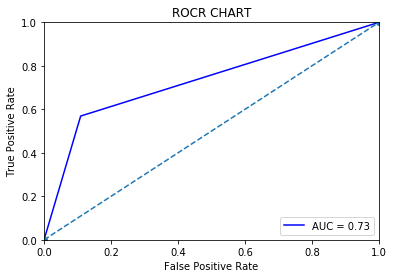

In [24]:
fpr , tpr , th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.title('ROCR CHART' )
plt.plot(fpr,tpr, 'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


# Confusion Matrix

Confusion Matrix


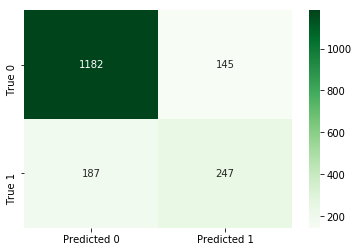

In [25]:
print("Confusion Matrix")
cf= metrics.confusion_matrix(test_y,classes)
lbl1 =["Predicted 0" , "Predicted 1"]
lbl2 = ["True 0 " , "True 1 "]

sns.heatmap(cf , annot=True , cmap= "Greens" , fmt ="d" , xticklabels=lbl1 , yticklabels = lbl2)
plt.show();